In [28]:
import pandas as pd
import numpy as np
import sklearn.ensemble as ske
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import  tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


#IMPORT DATA
data = pd.read_csv("MalwareData1.csv" , sep="|")
X = data.drop(['Name', 'md5', 'legitimate'], axis=1).values
y = data['legitimate'].values

print('Checking feature importance based on %i total features\n' % X.shape[1])

# Feature selection using RandomForest Classifier
fsel = RandomForestClassifier().fit(X, y)
#model = SelectFromModel(fsel, prefit=True, threshold=1e-4) #changing threshold from default mean 
model = SelectFromModel(fsel, prefit=True) 
X_new = model.transform(X)
nb_features = X_new.shape[1]

X_train, X_test, y_train, y_test =train_test_split(X_new, y ,test_size=0.2)

features = []

print('%i features identified as important:' % nb_features)

indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
for f in range(nb_features):
    print("%d. feature %s (%f)" % (f + 1, data.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))

# XXX : take care of the feature order
for f in sorted(np.argsort(fsel.feature_importances_)[::-1][:nb_features]):
    features.append(data.columns[2+f])

#Algorithm comparison
algorithms = {
        "DecisionTree": tree.DecisionTreeClassifier(),
       "RandomForest": ske.RandomForestClassifier(),
        "XGB": XGBClassifier()
    }

results = {}
print("\nTrying different algorithms")
print("+"*125)
for algo in algorithms:
    clf = algorithms[algo]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("%s : %f %%" % (algo, score*100))
    #print("Hyper Parms Used:", clf.get_params())
    #print("+"*125)
    print("+"*125)
    results[algo] = score

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' % (winner, results[winner]*100))



# Identify false and true positive rates
clf = algorithms[winner]
res = clf.predict(X_test)
mt = confusion_matrix(y_test, res)
print(mt)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))


Checking feature importance based on 54 total features

14 features identified as important:
1. feature ImageBase (0.128366)
2. feature SizeOfStackReserve (0.113356)
3. feature VersionInformationSize (0.109817)
4. feature MinorImageVersion (0.080544)
5. feature ResourcesMinSize (0.070213)
6. feature MajorOperatingSystemVersion (0.059603)
7. feature Characteristics (0.048401)
8. feature Subsystem (0.041733)
9. feature SectionsMaxEntropy (0.033611)
10. feature ResourcesNb (0.029696)
11. feature ExportNb (0.029112)
12. feature BaseOfData (0.028953)
13. feature ResourcesMinEntropy (0.019353)
14. feature ResourcesMaxEntropy (0.019109)

Trying different algorithms
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DecisionTree : 99.127128 %
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
RandomForest : 99.355306 %
+++++++++++++++++++++++++++

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [20]:
#Split data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:

# define models
lr = XGBClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [22]:
# fit the models 
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

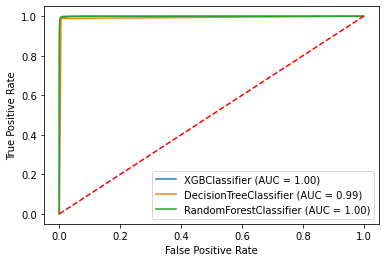

In [27]:
import matplotlib.pyplot as plt
#Plot ROC AUC
disp = plot_roc_curve (lr, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1],'r--')

